In [1]:
import requests
import json
import pandas as pd
from functools import reduce
from pandas.io.json import json_normalize

URL = 'http://real_search:8983/solr/dbnews/select'
T_URL = 'http://search:8983/solr/news/select'
def get_search_result(search_words, from_dt, to_dt):

    num_row = 100
    total = 1
    result_docs = []
    start = 0
    while total > start :
        params = {'debugQuery':'on','indent': 'on', 'q': 'title:"(' + search_words  + ')"~100 AND article:"' + search_words + '" AND datetime:[' + from_dt + 'T00:00:00Z TO ' + to_dt + 'T23:59:59Z]', 'sort': 'datetime desc', 'wt': 'json', 'start':start, 'rows':num_row}
        res = requests.get(URL, params=params)
        response = json.loads(res.text)
        total = response["response"]["numFound"]
        docs = response["response"]["docs"]
        #print("total:%d, start at %d" %(total, start))
        start = start + num_row
        result_docs.append(docs)

    merged_result = reduce(lambda x,y: x+y,result_docs)
    return merged_result


def get_tot_search_result(search_words, from_dt, to_dt):

    num_row = 100
    total = 1
    result_docs = []
    start = 0
    while total > start :
        params = {'debugQuery':'on','indent': 'on', 'q': 'title:"(' + search_words  + ')"~100 AND article:"' + search_words + '" AND datetime:[' + from_dt + 'T00:00:00Z TO ' + to_dt + 'T23:59:59Z]', 'sort': 'datetime desc', 'wt': 'json', 'start':start, 'rows':num_row}
        res = requests.get(T_URL, params=params)
        response = json.loads(res.text)
        total = response["response"]["numFound"]
        docs = response["response"]["docs"]
        #print("total:%d, start at %d" %(total, start))
        start = start + num_row
        result_docs.append(docs)

    merged_result = reduce(lambda x,y: x+y,result_docs)
    return merged_result

In [2]:
from_dt = '2017-03-27'
to_dt = '2017-05-08'

In [3]:
df_tot_moon_result = json_normalize(get_tot_search_result('문재인', from_dt, to_dt))
df_tot_ahn_result = json_normalize(get_tot_search_result('안철수',  from_dt, to_dt))
df_tot_hong_result = json_normalize(get_tot_search_result('홍준표', from_dt, to_dt))
df_tot_you_result = json_normalize(get_tot_search_result('유승민',  from_dt, to_dt))
df_tot_sim_result = json_normalize(get_tot_search_result('심상정',  from_dt, to_dt))
    
df_moon_result = json_normalize(get_search_result('문재인', from_dt, to_dt))
df_ahn_result = json_normalize(get_search_result('안철수',  from_dt, to_dt))
df_hong_result = json_normalize(get_search_result('홍준표', from_dt, to_dt))
df_you_result = json_normalize(get_search_result('유승민',  from_dt, to_dt))
df_sim_result = json_normalize(get_search_result('심상정',  from_dt, to_dt))

In [4]:
df_moon_result['tot'] = df_moon_result['n_shares'].fillna(0) + df_moon_result['o_shares'].fillna(0) 
df_ahn_result['tot'] = df_ahn_result['n_shares'].fillna(0) + df_ahn_result['o_shares'].fillna(0) 
df_hong_result['tot'] = df_hong_result['n_shares'].fillna(0) + df_hong_result['o_shares'].fillna(0) 
df_you_result['tot'] = df_you_result['n_shares'].fillna(0) + df_you_result['o_shares'].fillna(0) 
df_sim_result['tot'] = df_sim_result['n_shares'].fillna(0) + df_sim_result['o_shares'].fillna(0) 

In [5]:
df_moon_result['can_no'] = '01'
df_ahn_result['can_no'] = '02'
df_hong_result['can_no'] = '03'
df_you_result['can_no'] = '04'
df_sim_result['can_no'] = '05'

df_all_result=df_moon_result
df_all_result=df_all_result.append([df_ahn_result, df_hong_result, df_you_result, df_sim_result], ignore_index=True)
df_all_result['can_no'].unique()
#df_all_result.tail()

array(['01', '02', '03', '04', '05'], dtype=object)

http://stackoverflow.com/questions/24203106/pandas-group-by-calendar-week-then-plot-grouped-barplots-for-the-real-datetime

In [6]:
df_all_result['datetime']=pd.to_datetime(df_all_result['datetime'])
df_by_date = df_all_result[['can_no', 'datetime', 'tot']].groupby(['can_no', 'datetime'])

In [7]:

df_all_result.groupby('can_no').apply(lambda g:g.set_index('datetime')[['tot']].resample('W').sum()).fillna(0)

tot
can_no datetime          
01     2017-04-02   835.0
       2017-04-09  5036.0
       2017-04-16   266.0
       2017-04-23   300.0
       2017-04-30   323.0
       2017-05-07   218.0
       2017-05-14    25.0
02     2017-04-02  1602.0
       2017-04-09   233.0
       2017-04-16   261.0
       2017-04-23   259.0
       2017-04-30   208.0
       2017-05-07   131.0
       2017-05-14    18.0
03     2017-04-02   872.0
       2017-04-09   220.0
       2017-04-16   203.0
       2017-04-23   169.0
       2017-04-30   322.0
       2017-05-07   186.0
       2017-05-14    82.0
04     2017-04-02   288.0
       2017-04-09   103.0
       2017-04-16    98.0
       2017-04-23   107.0
       2017-04-30    66.0
       2017-05-07    92.0
       2017-05-14    16.0
05     2017-04-02    13.0
       2017-04-09    24.0
       2017-04-16    24.0
       2017-04-23   115.0
       2017-04-30    99.0
       2017-05-07    32.0
       2017-05-14    20.0

In [10]:
from matplotlib import font_manager, rc
# 나눔 폰트 설치 https://www.howtoinstall.co/en/ubuntu/trusty/fonts-nanum
# rm ~/.cache/matplotlib
# notebook 재 시작후

font_fname = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

Index(['can_no', 'datetime', 'tot'], dtype='object')

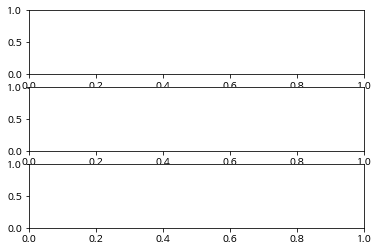

In [59]:
import matplotlib.pyplot as plt
f, a = plt.subplots(3,1)
df_test=df_all_result[['can_no', 'datetime', 'tot']]
df_test.columns

In [65]:
df_test

,can_no,datetime,tot
0,01,2017-04-30,1.0
1,01,2017-04-30,3.0
2,01,2017-04-30,1.0
3,01,2017-04-30,1.0
4,01,2017-04-30,1.0
5,01,2017-04-30,1.0
6,01,2017-04-29,1.0
7,01,2017-04-29,1.0
8,01,2017-04-29,1.0
9,01,2017-04-29,1.0


In [ ]:
'''
grouped = (df_moon_result                
    .apply(lambda g:               # work on groups of col1
        g.set_index('datetime')        
        [['tot']]
        .resample('W', how='sum')  # sum the amount field across weeks
    )
    .unstack(level=0)              # pivot the col1 index rows to columns
    .fillna(0)
)

grouped.columns=grouped.columns.droplevel()   # drop the 'col1' part of the multi-index column names
grouped
'''

df_moon_result['date']=pd.to_datetime(df_moon_result['datetime'].str.slice(0,10))
df_moon_result.groupby('ns').apply(lambda g:g.set_index('date')[['tot']].resample('W').sum()).fillna(0)

In [8]:
tot = len(df_moon_result) + len(df_ahn_result) + len(df_hong_result) + len(df_you_result)+ len(df_sim_result)

In [9]:
tot_article = len(df_tot_moon_result) + len(df_tot_ahn_result) + len(df_tot_hong_result) + len(df_tot_you_result)+ len(df_tot_sim_result)

# 후보자별 공유된 뉴스 비율

후보자별 공유된 뉴스 갯수/전체 공유된 뉴스 합

In [10]:
print("문재인 : %0.2f" %(len(df_moon_result)*100/tot))
print("안철수 : %0.2f" %(len(df_ahn_result)*100/tot))
print("홍준표 : %0.2f" %(len(df_hong_result)*100/tot))
print("유승민 : %0.2f" %(len(df_you_result)*100/tot))
print("심상정 : %0.2f" %(len(df_sim_result)*100/tot))

문재인 : 32.31
안철수 : 26.34
홍준표 : 21.93
유승민 : 13.05
심상정 : 6.37


In [11]:
print("문재인 : %0.2f" %(len(df_tot_moon_result)*100/tot_article))
print("안철수 : %0.2f" %(len(df_tot_ahn_result)*100/tot_article))
print("홍준표 : %0.2f" %(len(df_tot_hong_result)*100/tot_article))
print("유승민 : %0.2f" %(len(df_tot_you_result)*100/tot_article))
print("심상정 : %0.2f" %(len(df_tot_sim_result)*100/tot_article))

문재인 : 34.94
안철수 : 31.33
홍준표 : 16.97
유승민 : 11.65
심상정 : 5.12


In [12]:
shared_tot = df_moon_result['tot'].sum()+df_ahn_result['tot'].sum()+df_you_result['tot'].sum()+df_hong_result['tot'].sum()+df_sim_result['tot'].sum()

# 후보자별 뉴스 공유수 비율

후보자별 뉴스 공유수 합/전체 뉴스 공유 수

In [13]:
print("문재인 : %0.2f" %(df_moon_result['tot'].sum()*100/shared_tot))
print("안철수 : %0.2f" %(df_ahn_result['tot'].sum()*100/shared_tot))
print("홍준표 : %0.2f" %(df_hong_result['tot'].sum()*100/shared_tot))
print("유승민 : %0.2f" %(df_you_result['tot'].sum()*100/shared_tot))
print("심상정 : %0.2f" %(df_sim_result['tot'].sum()*100/shared_tot))

문재인 : 54.43
안철수 : 21.08
홍준표 : 15.96
유승민 : 5.98
심상정 : 2.54


In [14]:
moon_by_media = df_moon_result[['ns', 'n_shares', 'o_shares', 'tot']].groupby('ns')
ahn_by_media = df_ahn_result[['ns', 'n_shares', 'o_shares', 'tot']].groupby('ns')
hong_by_media = df_hong_result[['ns', 'n_shares', 'o_shares', 'tot']].groupby('ns')
you_by_media = df_you_result[['ns', 'n_shares', 'o_shares', 'tot']].groupby('ns')
sim_by_media = df_sim_result[['ns', 'n_shares', 'o_shares', 'tot']].groupby('ns')

In [15]:
tot_moon_by_media = df_tot_moon_result[['oid', 'id']].groupby('oid')
tot_ahn_by_media = df_tot_ahn_result[['oid', 'id']].groupby('oid')
tot_hong_by_media = df_tot_hong_result[['oid', 'id']].groupby('oid')
tot_you_by_media = df_tot_you_result[['oid', 'id']].groupby('oid')
tot_sim_by_media = df_tot_sim_result[['oid', 'id']].groupby('oid')

# 문재인 후보 언론사별 공유수

In [16]:
moon_by_media.sum()

,n_shares,o_shares,tot
ns,,,
news2016.chosun,2.0,47.0,49.0
news2016.donga,74.0,114.0,188.0
news2016.edaily,193.0,50.0,243.0
news2016.hani,3.0,53.0,56.0
news2016.joins,79.0,147.0,226.0
news2016.jtbc,12.0,29.0,41.0
news2016.kbs,95.0,39.0,134.0
news2016.kh,46.0,4482.0,4528.0
news2016.mbc,NaN,18.0,18.0


In [17]:
tot_moon_by_media.count()

,id
oid,
001,245
008,1437
009,301
018,911
020,352
023,181
025,474
028,186
032,448


# 안철수 후보 언론사별 공유수

In [18]:
ahn_by_media.sum()

,n_shares,o_shares,tot
ns,,,
news2016.chosun,5.0,994.0,999.0
news2016.donga,35.0,65.0,100.0
news2016.edaily,131.0,18.0,149.0
news2016.hani,2.0,21.0,23.0
news2016.joins,31.0,333.0,364.0
news2016.jtbc,7.0,28.0,35.0
news2016.kbs,37.0,66.0,103.0
news2016.kh,40.0,118.0,158.0
news2016.mbc,NaN,10.0,10.0


In [19]:
tot_ahn_by_media.count()

,id
oid,
001,352
008,1056
009,251
018,760
020,303
023,207
025,336
028,158
032,358


# 홍준표 후보 언론사별 공유수

In [20]:
hong_by_media.sum()

,n_shares,o_shares,tot
ns,,,
news2016.chosun,2.0,43.0,45.0
news2016.donga,15.0,70.0,85.0
news2016.edaily,201.0,5.0,206.0
news2016.hani,NaN,79.0,79.0
news2016.joins,19.0,122.0,141.0
news2016.jtbc,2.0,27.0,29.0
news2016.kbs,45.0,70.0,115.0
news2016.kh,15.0,105.0,120.0
news2016.mbc,NaN,3.0,3.0


# 유승민 후보 언론사별 공유수

In [21]:
you_by_media.sum()

,n_shares,o_shares,tot
ns,,,
news2016.chosun,25.0,35.0,60.0
news2016.donga,15.0,16.0,31.0
news2016.edaily,22.0,5.0,27.0
news2016.hani,NaN,80.0,80.0
news2016.joins,29.0,52.0,81.0
news2016.jtbc,5.0,16.0,21.0
news2016.kbs,15.0,21.0,36.0
news2016.kh,7.0,28.0,35.0
news2016.mbc,3.0,15.0,18.0


# 심상정 후보 언론사별 공유수

In [22]:
sim_by_media.sum()

,n_shares,o_shares,tot
ns,,,
news2016.chosun,NaN,12.0,12.0
news2016.donga,2.0,16.0,18.0
news2016.edaily,21.0,NaN,21.0
news2016.hani,2.0,9.0,11.0
news2016.joins,2.0,2.0,4.0
news2016.jtbc,7.0,4.0,11.0
news2016.kbs,6.0,1.0,7.0
news2016.kh,36.0,21.0,57.0
news2016.mbc,2.0,5.0,7.0


In [ ]:
df_sim_result[df_sim_result["ns"]=='news2016.nocut']